In [1]:
from bs4 import BeautifulSoup
import requests
import re
import csv
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math

import string, unicodedata
#import contractions
#import inflect
from time import sleep
#from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', None) 

In [2]:
TextData=pd.read_csv("processedData6Aug.csv")

In [3]:
TextData.head()

,Tokens,MsgSentenceTokens,NormTokens,POS_Msg,Sentiments,Sentiments2,stems,lemmas,articles,TFIDF,POS_Msg2
0,"['No', 'wonder', 'Jose', 'Mourinho', 'is', 'worried', 'about', 'the', 'start', 'of', 'the', 'new', 'season', '.', 'Four', 'days', 'to', 'go', 'until', 'it', 'kicks', 'off', 'at', 'Old', 'Trafford', 'and', 'he', 'is', 'still', 'waiting', 'for', 'the', 'real', 'Manchester', 'United', 'to', 'turn', 'up', '.', 'This', 'has', 'been', 'a', 'strange', ',', 'disjointed', 'few', 'weeks', 'for', 'Mourinho', 'and', 'his', 'players', ',', 'and', 'it', 'showed', 'as', 'they', 'completed', 'their', 'pre-season', 'on', 'a', 'muggy', 'night', 'in', 'Munich', '.', 'On', 'this', 'evidence', ',', 'whatever', 'team', 'United', 'put', 'out', 'on', 'Friday', 'night', 'will', 'struggle', 'to', 'overcome', 'Leicester', 'never', 'mind', 'challenge', 'Manchester', 'City', ""'s"", 'dominance', 'of', 'the', 'Premier', 'League', '.', 'BAYERN', 'MUNICH', '(', '3-4-3', ')', ':', 'Neuer', ';', 'Kimmich', '(', 'Rudy', '72', ')', ',', 'Sule', ',', 'Hummels', '(', 'Boateng', '46', ')', ',', 'Alaba', '(', 'Bernat', '56...","['No wonder Jose Mourinho is worried about the start of the new season.', 'Four days to go until it kicks off at Old Trafford and he is still waiting for the real Manchester United to turn up.', 'This has been a strange, disjointed few weeks for Mourinho and his players, and it showed as they completed their pre-season on a muggy night in Munich.', ""On this evidence, whatever team United put out on Friday night will struggle to overcome Leicester never mind challenge Manchester City's dominance of the Premier League."", 'BAYERN MUNICH (3-4-3): Neuer; Kimmich (Rudy 72), Sule, Hummels (Boateng 46), Alaba (Bernat 56); Martinez; Robben, Muller, Thiago (Rafinha 60), Ribery; Gnabry.', 'Subs: Ulreich, Hoffmann, Lewandowski, Boateng, Goretzka, Coman, Mai, Zylla, Franzke.', 'Booked: Boateng Scorer: Martinez 59 MAN UTD (4-3-3): De Gea (Grant 78); Darmian (Jones 65), Bailly (Smalling 51), Lindelof (Tuanzebe 78), Shaw (Mitchell 78); Herrera (Garner 81), Pereira, Fred (Chong 78); Mata (McTominay...","['no', 'wonder', 'jose', 'mourinho', 'worried', 'start', 'new', 'season', 'four', 'days', 'go', 'kicks', 'old', 'trafford', 'still', 'waiting', 'real', 'manchester', 'united', 'turn', 'this', 'strange', 'disjointed', 'weeks', 'mourinho', 'players', 'showed', 'completed', 'preseason', 'muggy', 'night', 'munich', 'on', 'evidence', 'whatever', 'team', 'united', 'put', 'friday', 'night', 'struggle', 'overcome', 'leicester', 'never', 'mind', 'challenge', 'manchester', 'city', 's', 'dominance', 'premier', 'league', 'bayern', 'munich', '343', 'neuer', 'kimmich', 'rudy', '72', 'sule', 'hummels', 'boateng', '46', 'alaba', 'bernat', '56', 'martinez', 'robben', 'muller', 'thiago', 'rafinha', '60', 'ribery', 'gnabry', 'subs', 'ulreich', 'hoffmann', 'lewandowski', 'boateng', 'goretzka', 'coman', 'mai', 'zylla', 'franzke', 'booked', 'boateng', 'scorer', 'martinez', '59', 'man', 'utd', '433', 'de', 'gea', 'grant', '78', 'darmian', 'jones', '65', 'bailly', 'smalling', '51', 'lindelof', 'tuanzebe',...","[('no', 'DT'), ('wonder', 'NN'), ('jose', 'NN'), ('mourinho', 'NN'), ('worried', 'VBD'), ('start', 'JJ'), ('new', 'JJ'), ('season', 'NN'), ('four', 'CD'), ('days', 'NNS'), ('go', 'VBP'), ('kicks', 'NNS'), ('old', 'JJ'), ('trafford', 'NN'), ('still', 'RB'), ('waiting', 'VBG'), ('real', 'JJ'), ('manchester', 'NN'), ('united', 'VBD'), ('turn', 'NN'), ('this', 'DT'), ('strange', 'JJ'), ('disjointed', 'JJ'), ('weeks', 'NNS'), ('mourinho', 'NN'), ('players', 'NNS'), ('showed', 'VBD'), ('completed', 'VBN'), ('preseason', 'NN'), ('muggy', 'NN'), ('night', 'NN'), ('munich', 'NN'), ('on', 'IN'), ('evidence', 'NN'), ('whatever', 'NN'), ('team', 'NN'), ('united', 'VBD'), ('put', 'NN'), ('friday', 'NN'), ('night', 'NN'), ('struggle', 'NN'), ('overcome', 'VBP'), ('leicester', 'NN'), ('never', 'RB'), ('mind', 'VBP'), ('challenge', 'JJ'), ('manchester', 'NN'), ('city', 'NN'), ('s', 'NN

In [8]:
dataset={}
for index,item in TextData.iterrows():
    #print(str(index)+" "+item["Subject"])
    key=index
    value=str(item["articles"]).lower().replace('\r',"")
    dataset[key]=value

In [267]:
dataset1={}
for index,item in TextData.iterrows():
    #print(str(index)+" "+item["Subject"])
    key=index
    value=str(''.join(item["NormTokens"]).lower().replace('\r',""))
    dataset1[key]=value

In [9]:
def tf(data,filename):
    text=data[filename]
    tokens=nltk.word_tokenize(text)
    fd=nltk.FreqDist(tokens)
    return fd

def idf(data,term):
    count=[term in data[mail_no] for mail_no in data]
    inv_feq=math.log(len(count)/sum(count))
    return inv_feq

def tfidf(data,srno,n):
    term_scores={}
    file_fd=tf(data,srno)
    for term in file_fd:
        if term.isalpha():
            idf_val=idf(data,term)
            tf_val=tf(data,srno)[term]
            tfidf_val=tf_val*idf_val
            term_scores[term]=round(tfidf_val,2)
    return sorted(term_scores.items(),key=lambda x:-x[1])[:n]

In [10]:
myli=[]
for item in dataset:
    myli.append(tfidf(dataset,item,25))

# Exp - for tokens fetched from csv

In [4]:
def tf2(data,filename):
    fd=nltk.FreqDist(word for word in data[filename].replace('\'','').replace(',',' ').split(' '))
    return fd

In [5]:
def idf2(data,term):
    count=[term in mail_no for mail_no in data]
    inv_feq=math.log(len(count)/sum(count))
    return inv_feq

In [6]:
def tfidf2(data,srno,n):
    term_scores={}
    file_fd=tf2(data,srno)
    for term in file_fd:
        if term.isalpha():
            idf_val=idf2(data,term)
            tf_val=tf2(data,srno)[term]
            tfidf_val=tf_val*idf_val
            term_scores[term]=round(tfidf_val,2)
    return sorted(term_scores.items(),key=lambda x:-x[1])[:n]

In [7]:
mylist=[]
for index,row in TextData.iterrows():
    mylist.append(tfidf2(TextData["NormTokens"].tolist(),index,25))

In [ ]:
df=pd.DataFrame({'TFIDF':mylist})

In [ ]:
frames = [TextData,df]

In [ ]:
TextData2=pd.concat(frames,axis=1,sort=False)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
vect = TfidfVectorizer(stop_words='english')

In [11]:
X = vect.fit_transform(TextData["NormTokens"])

In [249]:
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [12]:
X.shape

(87, 6810)

In [16]:
from sklearn import linear_model
from sklearn.decomposition import PCA

In [13]:
indices = np.argsort(vect.idf_)[::-1]
features = vect.get_feature_names()

top_n = 5
top_features = [features[i] for i in indices[:top_n]]
print (top_features)

['zylla', 'mouse', 'muhamed', 'muggy', 'mud']


In [14]:
indices

array([6809, 4061, 4074, ..., 4152, 6188, 5357], dtype=int64)

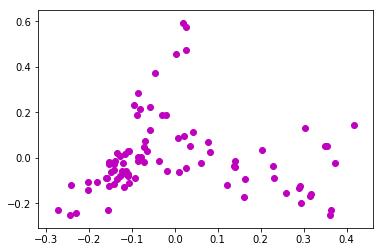

In [17]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

In [18]:
jj=pd.read_json("Sample json.txt")

In [19]:
for index,rows in jj.iterrows():
    print(rows)

In [ ]:
import json